In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/falcon_annotations_multiple2_annotator2.csv", sep= ",")
df.head()

,annotation_id,annotator,component_id,created_at,fallacy,id,lead_time,main_tweet,new_id,posterior_context,previous_context,updated_at
0,3471,3,249,2024-06-20T09:44:30.875808Z,"{""choices"":[""Loaded Language"",""Appeal to Ridic...",8418,1659.959,[main_tweet] [user47446]: @user @user @user ye...,106213,[context] [user104337]: @user @user ... @user...,NaN,2024-06-20T09:44:30.875831Z
1,3472,3,249,2024-06-20T09:46:54.742790Z,"{""choices"":[""Appeal to Ridicule"",""Hasty Genera...",8419,143.362,[main_tweet] [user1779]: @user @user ... @user...,83274,[context] [user47446]: @user @user ... @user ...,[context] [user104337]: @user @user ... @user ...,2024-06-20T09:46:54.742822Z
2,3473,3,249,2024-06-20T09:51:19.948042Z,Ad Hominem,8420,264.776,[main_tweet] [user1779]: @user @user ... @user...,144789,[context] [user47446]: @user @user ... @user ...,[context] [user1779]: @user @user ... @user ex...,2024-06-20T09:51:19.948065Z
3,3474,3,249,2024-06-20T09:52:20.700055Z,Appeal to Fear,8421,60.417,[main_tweet] [user79987]: @user @user ... @use...,124804,[context] [user47446]: @user @user ... @user ...,[context] [user79987]: @user @user ... @user H...,2024-06-20T09:52:20.700078Z
4,3475,3,249,2024-06-25T12:05:12.267556Z,Hasty Generalization,8422,301.410,[main_tweet] [user104337]: @user @user ... @us...,144792,[context] [user47446]: @user @user ... @user ...,[context] [user79987]: @user @user ... @user A...,2024-06-25T12:05:12.267581Z


In [4]:
df.columns

Index(['annotation_id', 'annotator', 'component_id', 'created_at', 'fallacy',
       'id', 'lead_time', 'main_tweet', 'new_id', 'posterior_context',
       'previous_context', 'updated_at'],
      dtype='object')

In [6]:
df.shape

(50, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   annotation_id      50 non-null     int64  
 1   annotator          50 non-null     int64  
 2   component_id       50 non-null     int64  
 3   created_at         50 non-null     object 
 4   fallacy            50 non-null     object 
 5   id                 50 non-null     int64  
 6   lead_time          50 non-null     float64
 7   main_tweet         50 non-null     object 
 8   new_id             50 non-null     int64  
 9   posterior_context  24 non-null     object 
 10  previous_context   25 non-null     object 
 11  updated_at         50 non-null     object 
dtypes: float64(1), int64(5), object(6)
memory usage: 4.8+ KB


In [9]:
df.fallacy.unique()

array(['{"choices":["Loaded Language","Appeal to Ridicule","Ad Hominem","False Dilemma"]}',
       '{"choices":["Appeal to Ridicule","Hasty Generalization"]}',
       'Ad Hominem', 'Appeal to Fear', 'Hasty Generalization',
       'None of the above', '{"choices":["Appeal to Fear","Ad Hominem"]}',
       '{"choices":["Loaded Language","Appeal to Fear","Appeal to Ridicule","Ad Hominem"]}',
       '{"choices":["Loaded Language","Hasty Generalization"]}',
       '{"choices":["Loaded Language","Ad Hominem"]}', 'False Dilemma',
       '{"choices":["Appeal to Ridicule","False Dilemma"]}',
       'Loaded Language',
       '{"choices":["Appeal to Fear","Hasty Generalization","False Dilemma"]}',
       'Appeal to Ridicule',
       '{"choices":["Appeal to Ridicule","Ad Hominem"]}',
       '{"choices":["Loaded Language","Appeal to Fear","False Dilemma"]}',
       '{"choices":["Loaded Language","Ad Hominem","False Dilemma"]}',
       '{"choices":["Loaded Language","Appeal to Ridicule","Ad Hominem"]

In [10]:
df.fallacy.nunique()

20

In [12]:
df.isnull().sum()

annotation_id         0
annotator             0
component_id          0
created_at            0
fallacy               0
id                    0
lead_time             0
main_tweet            0
new_id                0
posterior_context    26
previous_context     25
updated_at            0
dtype: int64

In [13]:
import ast

def extract_fallacies(val):
    try:
        # If it's a dict-like string, parse and extract the list
        if val.startswith('{') and "choices" in val:
            return ast.literal_eval(val)["choices"]
        # Otherwise assume it's a single fallacy
        return [val]
    except:
        return []

df["fallacy_list"] = df["fallacy"].apply(extract_fallacies)
df["fallacy_list"].head()


0    [Loaded Language, Appeal to Ridicule, Ad Homin...
1           [Appeal to Ridicule, Hasty Generalization]
2                                         [Ad Hominem]
3                                     [Appeal to Fear]
4                               [Hasty Generalization]
Name: fallacy_list, dtype: object

In [14]:
# Explode the list into individual rows
fallacy_exploded = df.explode("fallacy_list")

# Count frequency of each fallacy
fallacy_counts = fallacy_exploded["fallacy_list"].value_counts()

# Display the counts
fallacy_counts

fallacy_list
None of the above       15
Loaded Language         13
Ad Hominem              13
Appeal to Ridicule      10
Hasty Generalization    10
Appeal to Fear          10
False Dilemma            7
Name: count, dtype: int64

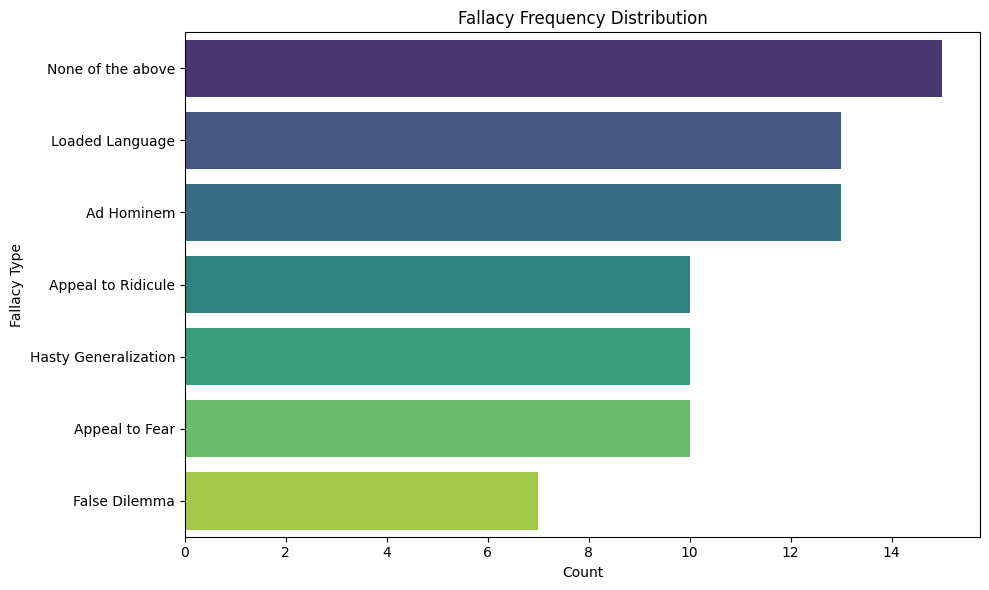

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=fallacy_counts.values, y=fallacy_counts.index, palette="viridis")

plt.title("Fallacy Frequency Distribution")
plt.xlabel("Count")
plt.ylabel("Fallacy Type")
plt.tight_layout()
plt.show()


In [16]:

df2 = pd.read_csv("../data/falcon_df_multilabel_annotations.csv", sep= ",")
df2.head()

,annotator,fallacy,id,lead_time,main_tweet,new_id,posterior_context,previous_context,updated_at,Ad Hominem,Appeal to Fear,Appeal to Ridicule,False Dilemma,Hasty Generalization,Loaded Language,None of the above,component_id
0,1,['None of the above'],5365,51.307,[main_tweet] [user104337]: @user @user ... @us...,144793,[context] [user79987]: @user @user ... @user ...,[context] [user47446]: @user @user @user yeh b...,2024-02-27T12:17:43.890057Z,0,0,0,0,0,0,1,NaN
1,1,['None of the above'],5366,49.260,[main_tweet] [user79987]: @user @user ... @use...,124801,[context] [user104337]: @user @user ... @user...,[context] [user47446]: @user @user @user yeh b...,2024-02-27T12:18:33.482380Z,0,0,0,0,0,0,1,NaN
2,1,['None of the above'],5367,64.336,[main_tweet] [user104337]: @user @user ... @us...,83279,[context] [user79987]: @user @user ... @user ...,[context] [user104337]: @user @user ... @user ...,2024-02-27T15:18:53.164245Z,0,0,0,0,0,0,1,NaN
3,1,"['Loaded Language', 'Ad Hominem']",5368,74.861,[main_tweet] [user79987]: @user @user ... @use...,124800,[context] [user1779]: @user @user ... @user f...,[context] [user79987]: @user @user ... @user T...,2024-04-05T09:50:00.162745Z,1,0,0,0,0,1,0,NaN
4,1,['None of the above'],5370,44.231,[main_tweet] [user47446]: @user @user ... @use...,165415,[context] [user1779]: @user @user ... @user t...,[context] [user79987]: @user @user ... @user T...,2024-02-27T12:21:12.844757Z,0,0,0,0,0,0,1,NaN


⏱ Why Is lead_time Important?
The lead_time column measures how long the annotator took to label that example.

Here’s why it matters for your project:

✅ 1. **Annotation Confidence Proxy**
Short time might mean the example was obvious (or rushed).

Long time might indicate a harder, ambiguous case.

→ You could filter out very quick annotations if you suspect they're low-quality or use long ones for model stress-testing.

✅ 2. **Quality Control**
You can:

Spot outliers (e.g. annotators that always take 2 seconds… 🤔)

Flag confusing examples that slow everyone down — these might be great for rule-based edge cases or extra training examples.

✅ 3. **UX Insight**
If you plan to build a practice mode or educational tool, lead_time gives insight into which types of fallacies take users longer to process — helpful for learning analytics.



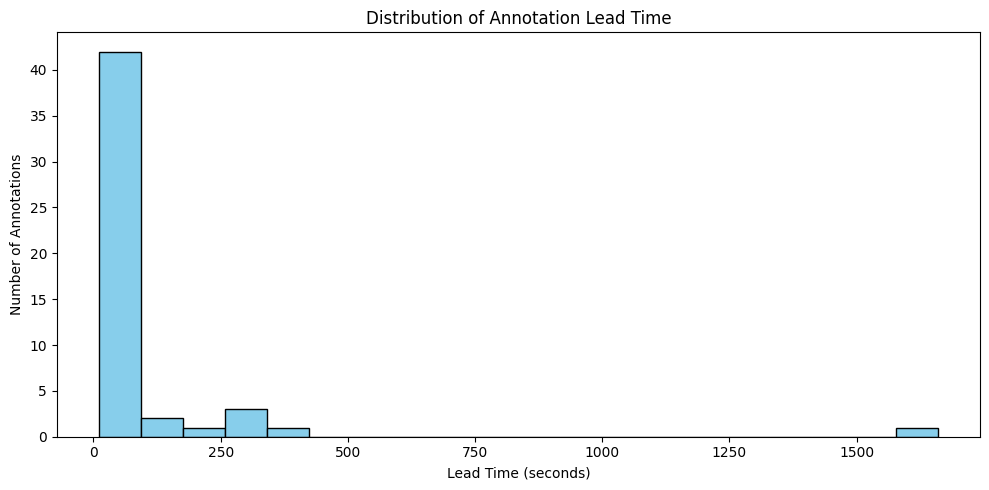

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(df["lead_time"], bins=20, color="skyblue", edgecolor="black")

plt.title("Distribution of Annotation Lead Time")
plt.xlabel("Lead Time (seconds)")
plt.ylabel("Number of Annotations")
plt.tight_layout()
plt.show()


In [20]:
# Use the exploded version for one fallacy per row
avg_lead_per_fallacy = fallacy_exploded.groupby("fallacy_list")["lead_time"].mean().sort_values(ascending=False)
avg_lead_per_fallacy


fallacy_list
False Dilemma           279.475857
Ad Hominem              221.441692
Appeal to Ridicule      219.381200
Loaded Language         217.743385
Hasty Generalization     85.359500
Appeal to Fear           68.969300
None of the above        34.953733
Name: lead_time, dtype: float64

- False Dilemma, Ad Hominem, and Appeal to Ridicule took the longest — possibly because they're more subtle or context-heavy.

- None of the above was quickest — which makes sense, probably easy to spot nothing was wrong.

could use this later to:

- Prioritize training examples that take longer.

- Weight predictions or difficulty levels in practice mode.

- Investigate why specific fallacies are tougher to label.